In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
products = pd.read_csv("products.csv")
sales = pd.read_csv("sales.csv")
inventory = pd.read_csv("inventory.csv")
regions = pd.read_csv("regions.csv")


### MERGE DATAFRAME

In [78]:
sales['profit'] = (sales['selling_price'] - sales['cost_price']) * sales['units_sold']
profit_per_product = sales.groupby('product_id')['profit'].sum().reset_index()


In [80]:
inv_profit_df = pd.merge(inventory, profit_per_product, on='product_id')


In [82]:
inv_profit_df = pd.merge(inv_profit_df, products[['product_id', 'category', 'sub_category']], on='product_id')


### RUN CORRELATION

In [86]:
correlation = inv_profit_df['inventory_days'].corr(inv_profit_df['profit'])
print(f"Correlation between inventory_days and profit: {correlation:.2f}")


Correlation between inventory_days and profit: 0.15


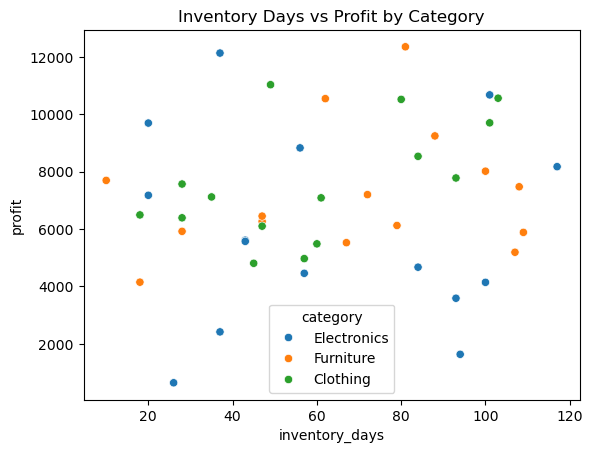

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=inv_profit_df, x='inventory_days', y='profit', hue='category')
plt.title('Inventory Days vs Profit by Category')
plt.show()
